In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Top 3 test runs

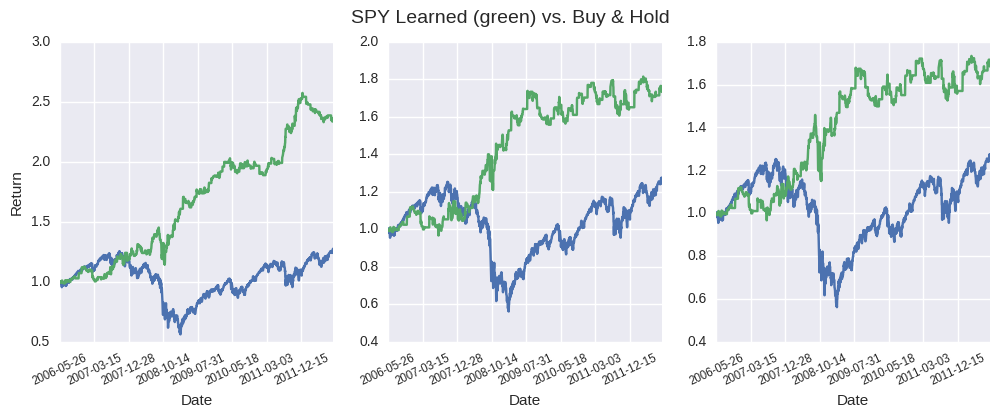

In [2]:
fig = plt.figure(figsize=(12,4))
df = pd.read_csv('rtntop.csv').set_index('date')
cols = [c for c in df.columns if 'rtn' in c]
for i, c in enumerate(cols):
    ax = plt.subplot(130+(1+i))
    df[['bhreturn',c]].plot(ax=ax)
    ax.legend().set_visible(False)
    ax.set_ylabel('Return').set_visible(False if i else True)
    ax.set_xlabel('Date')
    plt.xticks(rotation=25,size='x-small')
fig.suptitle('SPY Learned (green) vs. Buy & Hold', fontsize=14)
plt.gcf().subplots_adjust(bottom=0.15)
fig.savefig('topSPY.png', bbox_inches='tight')

# Q-learned trading performance

 * `alpha` and `gamma` parameters varied in range [0.1, 0.9]
 * `epsilon` set to 0.1
 * 500 unique stocks used, market data spanning 2000-2012
 * Each stock trained and tested in 5-way cross-validated manner
 * Agent trained for 100 episodes for each training set
 * ~800k data points

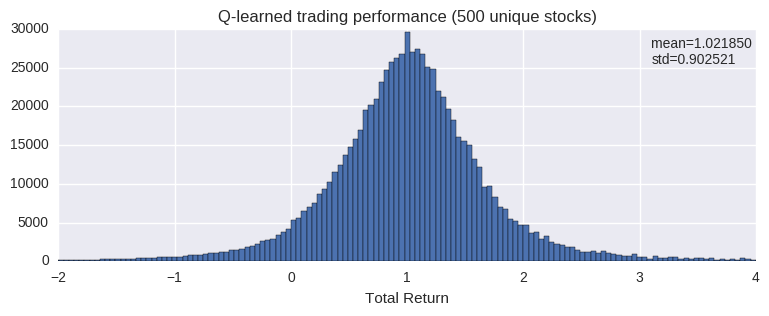

In [2]:
df = pd.read_csv('return.csv')
fig = plt.figure(figsize=(9,3))
ax = plt.subplot(111)
df.returns.hist(bins=1000, label='foo')
ax.set_xlim([-2,4])
ax.set_xlabel('Total Return')
ax.set_title('Q-learned trading performance (500 unique stocks)')
mean, std = df.returns.describe()[['mean','std']]
ax.annotate('mean={mean:0.6f}\nstd={std:0.6f}'.format(mean=mean, std=std),
            xy=(0, 0), xytext=(.85,.85), textcoords='axes fraction', size='small')
fig.savefig('return.png', bbox_inches='tight')

# Random trading performance

 * Long and short state chosen randomly

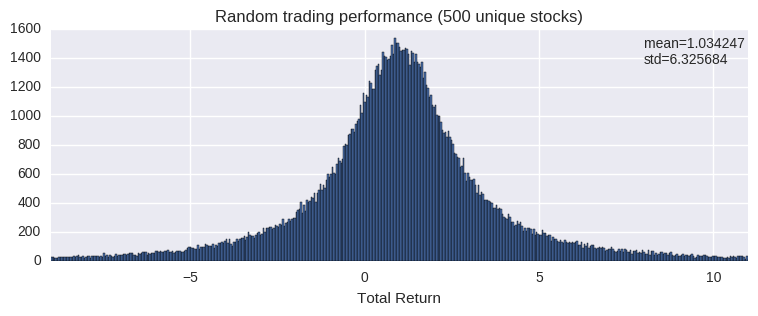

In [4]:
df = pd.read_csv('returnrand.csv')
fig = plt.figure(figsize=(9,3))
ax = plt.subplot(111)
df.returns.hist(bins=10000, label='foo')
ax.set_xlim([-9,11])
ax.set_xlabel('Total Return')
ax.set_title('Random trading performance (500 unique stocks)')
mean, std = df.returns.describe()[['mean','std']]
ax.annotate('mean={mean:0.6f}\nstd={std:0.6f}'.format(mean=mean, std=std),
            xy=(0, 0), xytext=(.85,.85), textcoords='axes fraction', size='small')
fig.savefig('returnrand.png', bbox_inches='tight')

# alpha & gamma

 * Total return averaged and plotted against alpha and gamma values

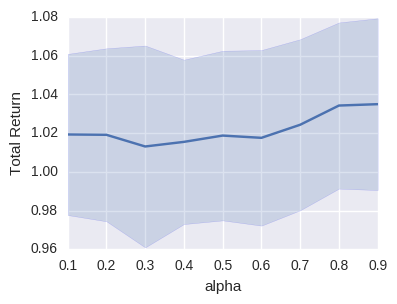

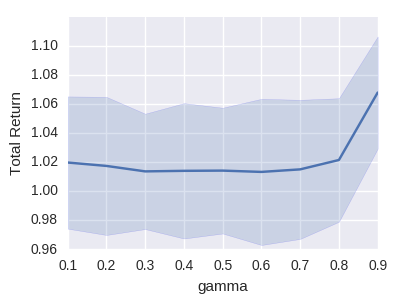

In [3]:
df = pd.read_csv('return.csv')

def _plot(df, var):
    series = df.groupby(var).returns
    mean = series.mean()
    # use log10 to diminish effect on plot
    err = np.log10(series.std())
    fig = plt.figure(figsize=(4,3))
    ax = plt.subplot(111)
    mean.plot(ax=ax)
    ax.set_ylabel('Total Return')
    plt.fill_between(mean.index, mean+err, mean-err, edgecolor='b', alpha=.2)
    fig.savefig('{}.png'.format(var), bbox_inches='tight')

_plot(df, 'alpha')
_plot(df, 'gamma')